In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df= pd.read_csv('dataset/1. Weather Data.csv', encoding= 'unicode_escape') 

In [3]:
#data types of all columns
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h     float64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [4]:
# Display the first five rows 
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-2012 00:00,NaN,-3.9,86,4.0,8.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87,4.0,8.0,101.24,Fog
2,01-01-2012 02:00,-1.8,-3.4,89,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,01-01-2012 03:00,-1.5,-3.2,88,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,01-01-2012 04:00,-1.5,-3.3,88,7.0,4.8,101.23,Fog


In [5]:
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-2012 00:00,NaN,-3.9,86,4.0,8.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87,4.0,8.0,101.24,Fog
2,01-01-2012 02:00,-1.8,-3.4,89,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,01-01-2012 03:00,-1.5,-3.2,88,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,01-01-2012 04:00,-1.5,-3.3,88,7.0,4.8,101.23,Fog
5,01-01-2012 05:00,-1.4,-3.3,87,9.0,6.4,101.27,Fog
6,01-01-2012 06:00,NaN,-3.1,89,7.0,6.4,101.29,Fog
7,01-01-2012 07:00,-1.4,-3.6,85,7.0,8.0,101.26,Fog
8,01-01-2012 08:00,-1.4,-3.6,85,9.0,8.0,101.23,Fog
9,01-01-2012 09:00,-1.3,-3.1,88,15.0,4.0,101.20,Fog


In [6]:
# Print the number of rows and columns in the DataFrame
print(df.shape)

(8784, 8)


In [7]:
# Display summary information about the DataFrame, including column types and non-null counts
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8780 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8778 non-null   float64
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 549.1+ KB


In [8]:
# Print the number of missing values in each column
print(df.isnull().sum())

Date/Time           0
Temp_C              4
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     6
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [9]:
# Function to detect outliers in a given column using the IQR (Interquartile Range) method.
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [10]:
# Detect and display outliers in wind speed.
outliers_wind = detect_outliers_iqr(df, 'Wind Speed_km/h')
print(f"Detected outliers: {len(outliers_wind)} rows")
print(outliers_wind[['Date/Time', 'Wind Speed_km/h']].head())

Detected outliers: 162 rows
           Date/Time  Wind Speed_km/h
25  01-02-2012 01:00             39.0
32  01-02-2012 08:00             39.0
33  01-02-2012 09:00             44.0
34  01-02-2012 10:00             43.0
36  01-02-2012 12:00             48.0


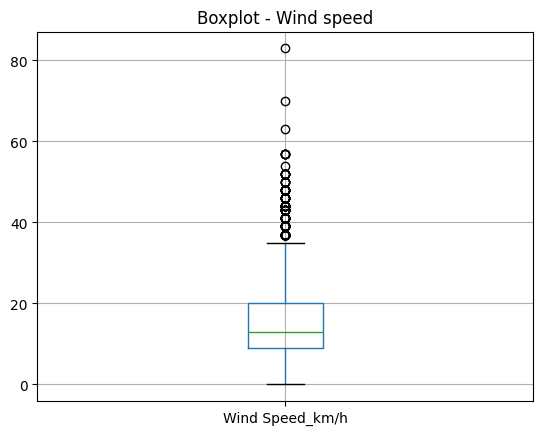

In [11]:
# Boxplot to visualize windspeed and spot outliers.
df.boxplot(column='Wind Speed_km/h')
plt.title('Boxplot - Wind speed')
plt.show()


In [12]:
# Detect and display outliers in temperature.
outliers_temp = detect_outliers_iqr(df, 'Temp_C')
print(f"Detected outliers: {len(outliers_temp)} rows")
print(outliers_temp[['Date/Time', 'Temp_C']].head())

Detected outliers: 0 rows
Empty DataFrame
Columns: [Date/Time, Temp_C]
Index: []


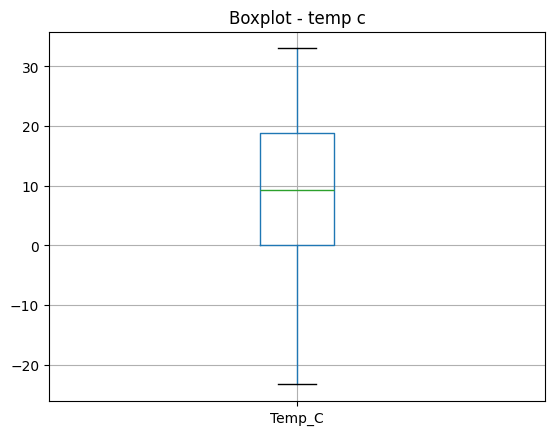

In [13]:
# Boxplot to visualize temperature and spot outliers.
df.boxplot(column='Temp_C')
plt.title('Boxplot - temp c')
plt.show()


In [14]:
# Fill missing values in Temp_C and Wind Speed using median.
df['Temp_C'] = df['Temp_C'].fillna(df['Temp_C'].median())

df['Wind Speed_km/h'] = df['Wind Speed_km/h'].fillna(df['Wind Speed_km/h'].median())

#Forward fill and backward fill for any remaining missing values 
df = df.ffill()  
df = df.bfill()  

print("All missing values handled successfully.")
print(df.isnull().sum())


All missing values handled successfully.
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [15]:
print(os.getcwd())  # Shows current working directory

# Then save the cleaned CSV here
df.to_csv("Cleaned_Weather_Data.csv", index=False)


C:\Users\gokha


In [16]:
# Rename 'Weather' column to 'Weather_Condition'
df = df.rename(columns = {'Weather' : 'Weather_Condition'})

In [17]:
# Filter and display rows where the weather is clear.
df[df['Weather_Condition'] == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition
67,01-03-2012 19:00,-16.9,-24.8,50,24.0,25.0,101.74,Clear
114,01-05-2012 18:00,-7.1,-14.4,56,11.0,25.0,100.71,Clear
115,01-05-2012 19:00,-9.2,-15.4,61,7.0,25.0,100.80,Clear
116,01-05-2012 20:00,-9.8,-15.7,62,9.0,25.0,100.83,Clear
117,01-05-2012 21:00,-9.0,-14.8,63,13.0,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4.0,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19.0,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11.0,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13.0,25.0,101.33,Clear


In [18]:
# Print mean values for temperature, wind speed, and visibility.
print(df['Temp_C'].mean())
print(df['Wind Speed_km/h'].mean())
print(df['Visibility_km'].mean())

8.803779599271403
14.941826047358834
27.664446721311474


In [19]:
# Print variance of atmospheric pressure.
print(df['Press_kPa'].var())

0.7123440111838424


In [20]:
# Filter data where wind speed is ≤30 km/h and temperature is above 0°C.
# Print matching dates and the number of such records.
windspeed=df[(df['Wind Speed_km/h'] <=30) & (df['Temp_C']>0)]
print(windspeed['Date/Time'])
print(windspeed.shape)

0       01-01-2012 00:00
6       01-01-2012 06:00
10      01-01-2012 10:00
13      01-01-2012 13:00
14      01-01-2012 14:00
              ...       
8545     12/22/2012 1:00
8546     12/22/2012 2:00
8547     12/22/2012 3:00
8779    12/31/2012 19:00
8780    12/31/2012 20:00
Name: Date/Time, Length: 6306, dtype: object
(6306, 8)


In [23]:
# Count frequency of each weather type and convert it to a DataFrame.
weather=df['Weather_Condition'].value_counts()
dfweather=pd.DataFrame(weather)
dfweather = dfweather.reset_index()
dfweather.columns = ['Weather', 'Frequency'] 
dfweather

,Weather,Frequency
0,Mainly Clear,2106
1,Mostly Cloudy,2069
2,Cloudy,1728
3,Clear,1326
4,Snow,390
5,Rain,306
6,Rain Showers,188
7,Fog,150
8,"Rain,Fog",116
9,"Drizzle,Fog",80


In [21]:
# Enable inline plotting for Jupyter Notebook.
%matplotlib inline

          Weather  Frequency
0    Mainly Clear       2106
1   Mostly Cloudy       2069
2          Cloudy       1728
3           Clear       1326
4            Snow        390
5            Rain        306
6    Rain Showers        188
7             Fog        150
8        Rain,Fog        116
9     Drizzle,Fog         80
10   Snow Showers         60
11        Drizzle         41
12       Snow,Fog         37


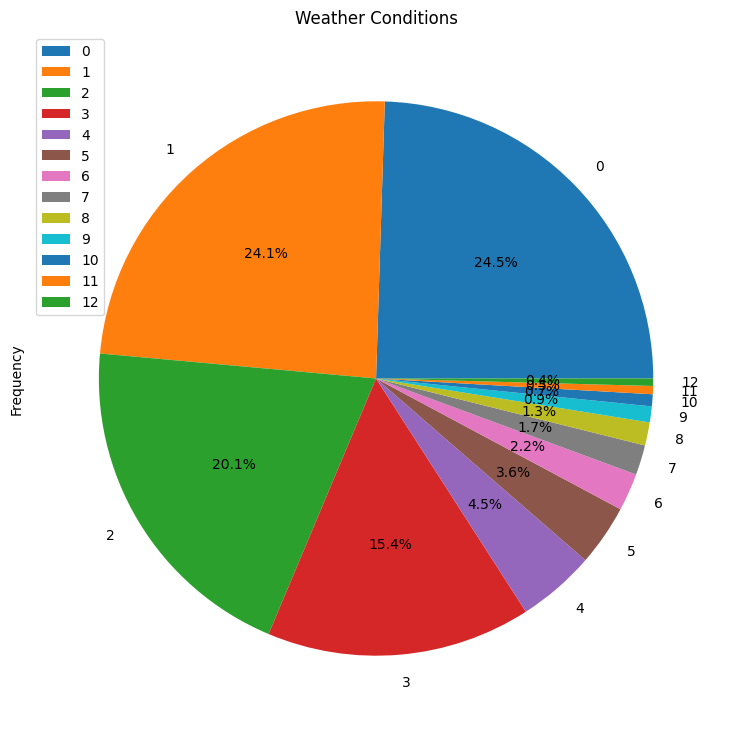

In [41]:
# pie chart for weather conditions that occurred more than 20 times.
keep=dfweather[dfweather['Frequency']>20]
print(keep)
keep.plot.pie(y='Frequency',autopct='%1.1f%%', shadow=False, figsize=(12,9))
plt.title("Weather Conditions")
plt.show()

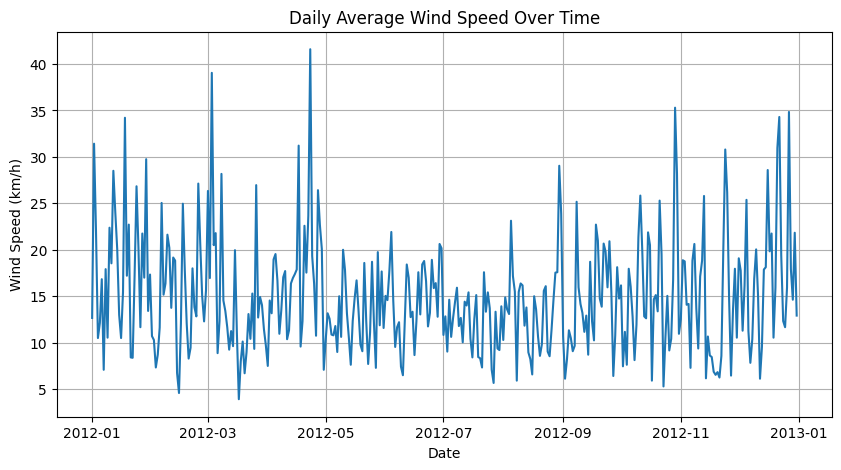

In [40]:
# Line plot of wind speed over time.
df['Date'] = pd.to_datetime(df['Date/Time'],format='mixed').dt.date
daily_wind = df.groupby('Date')['Wind Speed_km/h'].mean()

plt.figure(figsize=(10, 5))
daily_wind.plot()
plt.title('Daily Average Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.show()


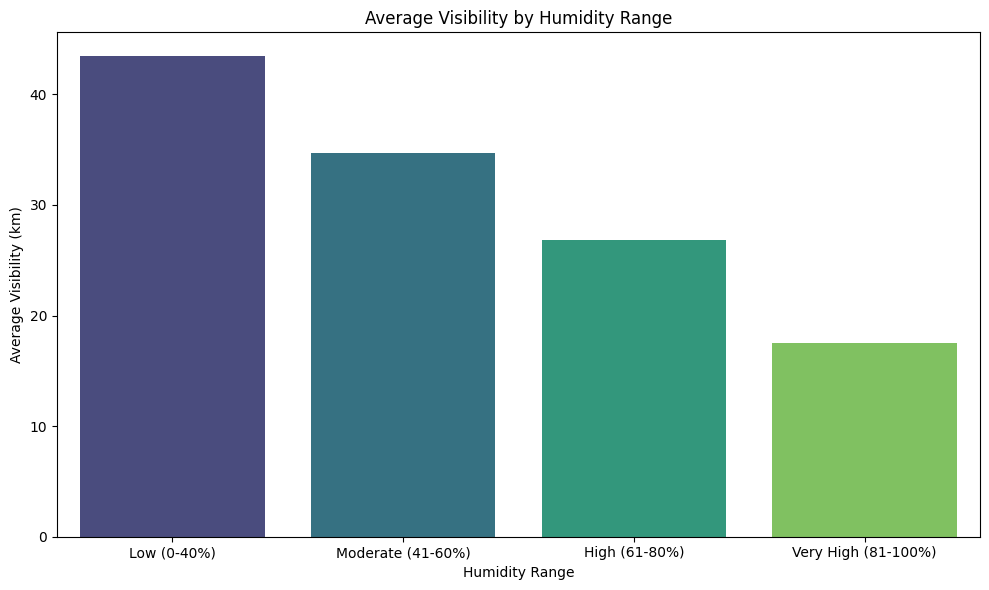

In [30]:
# Create humidity bins
df['Humidity_Range'] = pd.cut(df['Rel Hum_%'], bins=[0, 40, 60, 80, 100], 
                               labels=['Low (0-40%)', 'Moderate (41-60%)', 'High (61-80%)', 'Very High (81-100%)'])

# Group and calculate average visibility
avg_visibility = df.groupby('Humidity_Range', observed=True)['Visibility_km'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Humidity_Range', y='Visibility_km', hue='Humidity_Range',
            data=avg_visibility, palette='viridis', legend=False)
plt.title('Average Visibility by Humidity Range')
plt.xlabel('Humidity Range')
plt.ylabel('Average Visibility (km)')
plt.tight_layout()
plt.show()

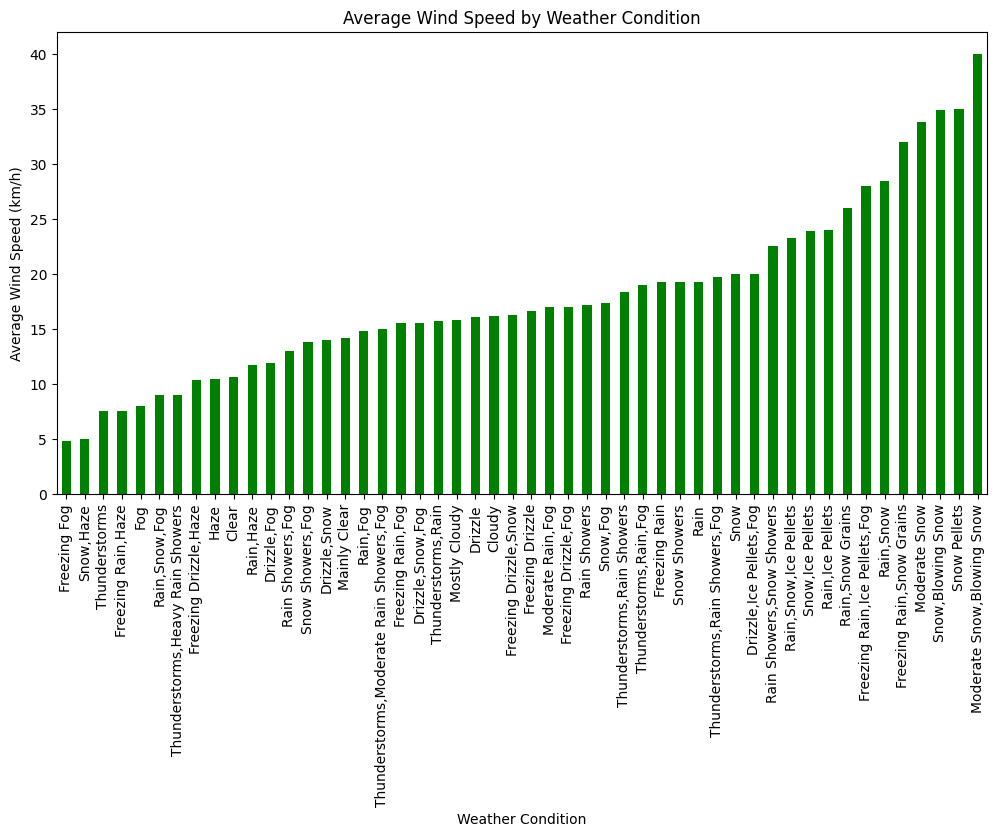

In [37]:
# Bar chart of average wind speed for each weather condition.
avg_wind_speed = df.groupby('Weather_Condition')['Wind Speed_km/h'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_wind_speed.plot(kind='bar', color='green')
plt.title('Average Wind Speed by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(rotation=90)
plt.show()  

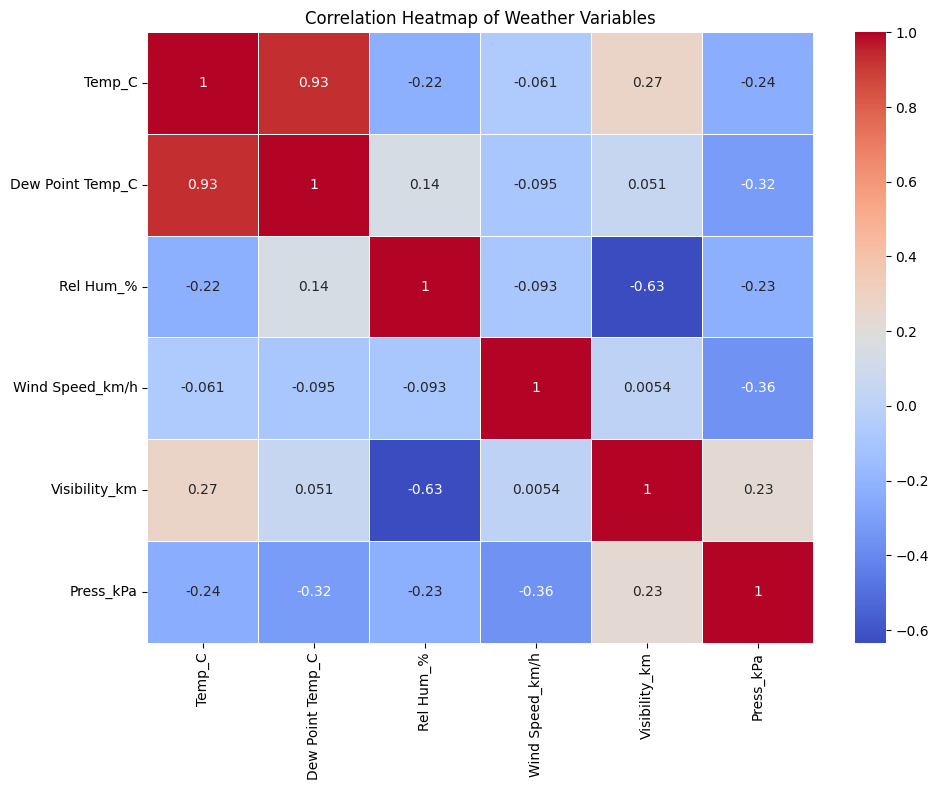

In [28]:
# Heatmap to visualize correlations between key weather variables.
plt.figure(figsize=(10, 8))
corr_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()


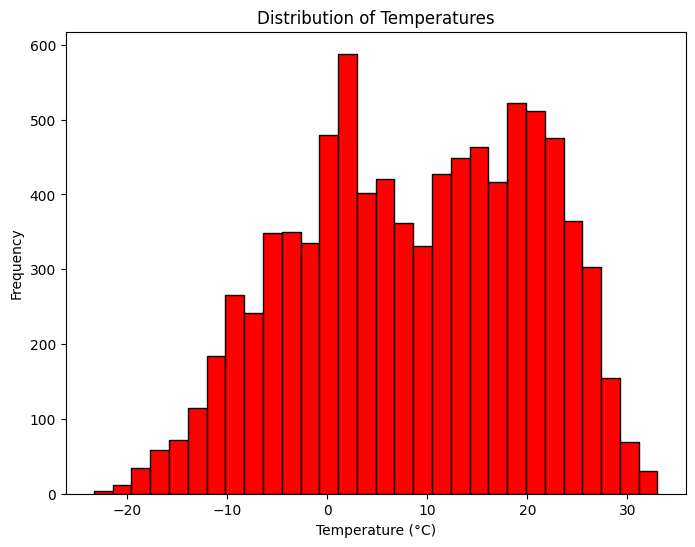

In [26]:
# Histogram to show the distribution of temperature values.
plt.figure(figsize=(8, 6))
plt.hist(df['Temp_C'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show() 

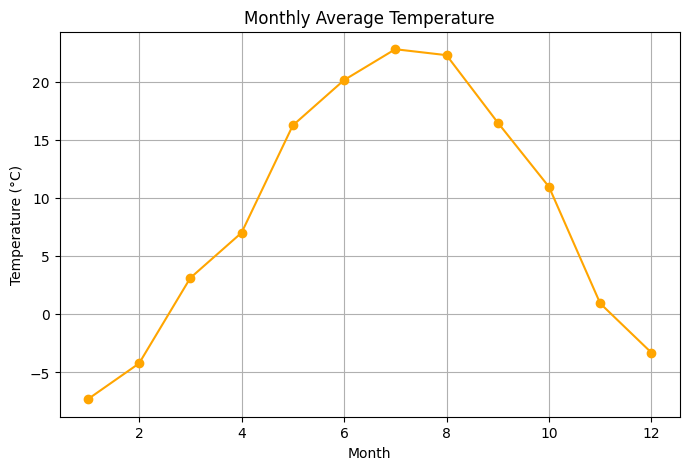

In [32]:
df['Month'] = pd.to_datetime(df['Date/Time'],format='mixed').dt.month
monthly_temp = df.groupby('Month')['Temp_C'].mean()
monthly_temp.plot(kind='line', marker='o', figsize=(8, 5), color='orange')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
